<a href="https://colab.research.google.com/github/haagrah/Projet-tutor-coursera-data-analysis-/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Chargement du dataset...")
df = pd.read_excel('Online Retail.xlsx')
print(f"Dataset chargé avec succès: {df.shape[0]} lignes, {df.shape[1]} colonnes")

print("\n=== Aperçu des premières lignes ===")
df.head()


Chargement du dataset...
Dataset chargé avec succès: 541909 lignes, 8 colonnes

=== Aperçu des premières lignes ===


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
## Task 2: Data Exploration and Understanding

# Information générale sur le dataset
print("\n=== Informations générales sur le dataset ===")
df.info()

# Statistiques descriptives
print("\n=== Statistiques descriptives ===")
df.describe()

# Vérification des valeurs manquantes
print("\n=== Valeurs manquantes ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage': missing_percentage.values
})
print(missing_df)

# Vérification des valeurs uniques
print("\n=== Nombre de valeurs uniques par colonne ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valeurs uniques")


=== Informations générales sur le dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

=== Statistiques descriptives ===

=== Valeurs manquantes ===
       Colonne  Valeurs manquantes  Pourcentage
0    InvoiceNo                   0     0.000000
1    StockCode                   0     0.000000
2  Description                1454     0.268311
3     

In [ ]:
## Task 3: Data Cleaning

print("\n=== NETTOYAGE DES DONNÉES ===")

# Copie pour le nettoyage
df_clean = df.copy()

print(f"Données originales: {df_clean.shape[0]} lignes")

# 1. Supprimer les lignes avec CustomerID manquant pour l'analyse client
df_clean = df_clean.dropna(subset=['CustomerID'])
print(f"Après suppression des CustomerID manquants: {df_clean.shape[0]} lignes")

# 2. Supprimer les lignes avec des quantités négatives (retours)
df_clean = df_clean[df_clean['Quantity'] > 0]
print(f"Après suppression des quantités négatives: {df_clean.shape[0]} lignes")

# 3. Supprimer les lignes avec des prix unitaires négatifs ou nuls
df_clean = df_clean[df_clean['UnitPrice'] > 0]
print(f"Après suppression des prix négatifs/nuls: {df_clean.shape[0]} lignes")

# 4. Créer des colonnes dérivées utiles
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

print(f"\nDataset nettoyé final: {df_clean.shape[0]} lignes, {df_clean.shape[1]} colonnes")




=== NETTOYAGE DES DONNÉES ===
Données originales: 541909 lignes
Après suppression des CustomerID manquants: 406829 lignes
Après suppression des quantités négatives: 397924 lignes
Après suppression des prix négatifs/nuls: 397884 lignes

Dataset nettoyé final: 397884 lignes, 13 colonnes


In [ ]:
## Task 4: Basic Statistics After Cleaning

print("\n=== STATISTIQUES APRÈS NETTOYAGE ===")
print(df_clean.describe())

# Période couverte par les données
print(f"\nPériode des données: du {df_clean['InvoiceDate'].min()} au {df_clean['InvoiceDate'].max()}")
print(f"Nombre de clients uniques: {df_clean['CustomerID'].nunique()}")
print(f"Nombre de produits uniques: {df_clean['StockCode'].nunique()}")
print(f"Nombre de pays: {df_clean['Country'].nunique()}")
print(f"Chiffre d'affaires total: ${df_clean['TotalAmount'].sum():,.2f}")




=== STATISTIQUES APRÈS NETTOYAGE ===
            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID    TotalAmount           Year          Month  \
count  397884.000000  397884.000000  397884.000000  397884.000000   
mean    15294.423453      22.397000    2010.934260       7.612475   
min     12346.000000       0.001000    2010.000000       1.000000   
25%     13969.000000       4.680000    2011.000000     


=== VISUALISATIONS ===


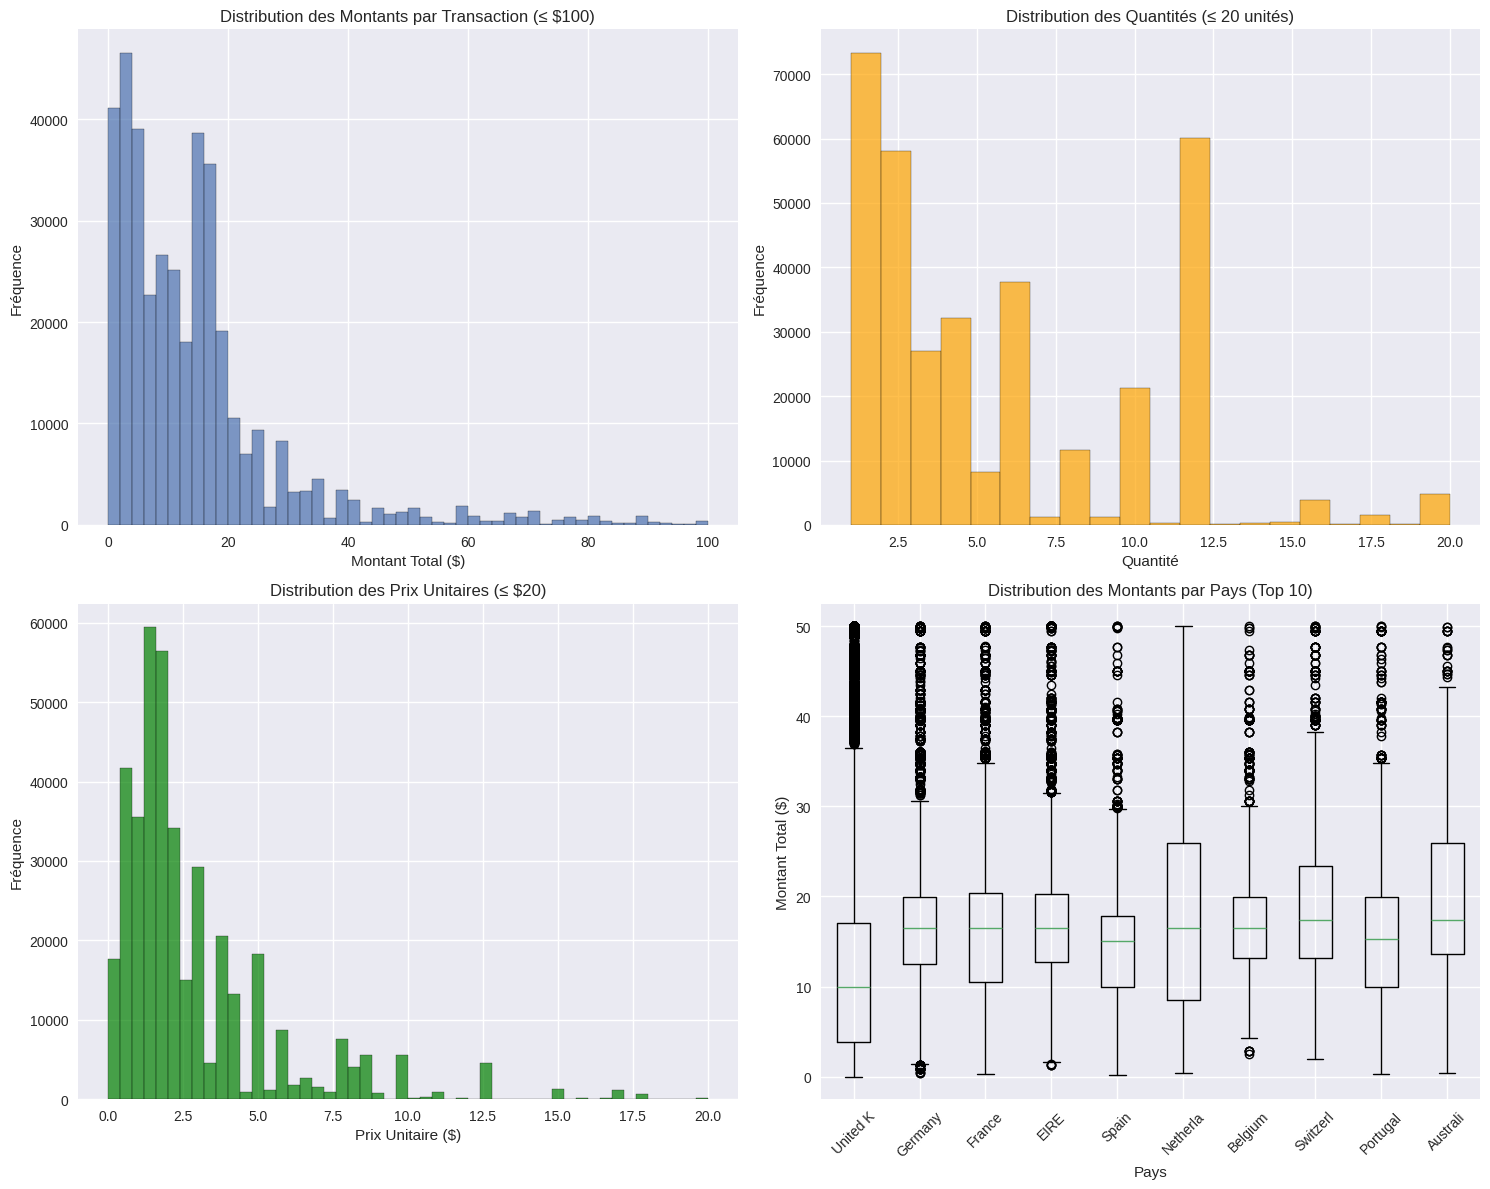

In [ ]:
## Task 5: Data Visualization

print("\n=== VISUALISATIONS ===")

# 1. Distribution des montants totaux
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution des montants (avec limite pour la lisibilité)
df_viz = df_clean[df_clean['TotalAmount'] <= 100]  # Limite pour la visualisation
axes[0, 0].hist(df_viz['TotalAmount'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution des Montants par Transaction (≤ $100)')
axes[0, 0].set_xlabel('Montant Total ($)')
axes[0, 0].set_ylabel('Fréquence')

# Distribution des quantités
df_qty_viz = df_clean[df_clean['Quantity'] <= 20]  # Limite pour la visualisation
axes[0, 1].hist(df_qty_viz['Quantity'], bins=20, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution des Quantités (≤ 20 unités)')
axes[0, 1].set_xlabel('Quantité')
axes[0, 1].set_ylabel('Fréquence')

# Distribution des prix unitaires
df_price_viz = df_clean[df_clean['UnitPrice'] <= 20]  # Limite pour la visualisation
axes[1, 0].hist(df_price_viz['UnitPrice'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Distribution des Prix Unitaires (≤ $20)')
axes[1, 0].set_xlabel('Prix Unitaire ($)')
axes[1, 0].set_ylabel('Fréquence')

# Boxplot des montants par pays (top 10)
top_countries = df_clean['Country'].value_counts().head(10).index
df_top_countries = df_clean[df_clean['Country'].isin(top_countries)]
df_box_viz = df_top_countries[df_top_countries['TotalAmount'] <= 50]  # Limite pour la lisibilité
axes[1, 1].boxplot([df_box_viz[df_box_viz['Country'] == country]['TotalAmount'].values
                    for country in top_countries],
                   labels=[country[:8] for country in top_countries])
axes[1, 1].set_title('Distribution des Montants par Pays (Top 10)')
axes[1, 1].set_xlabel('Pays')
axes[1, 1].set_ylabel('Montant Total ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


=== ANALYSE DES TENDANCES DE VENTES ===


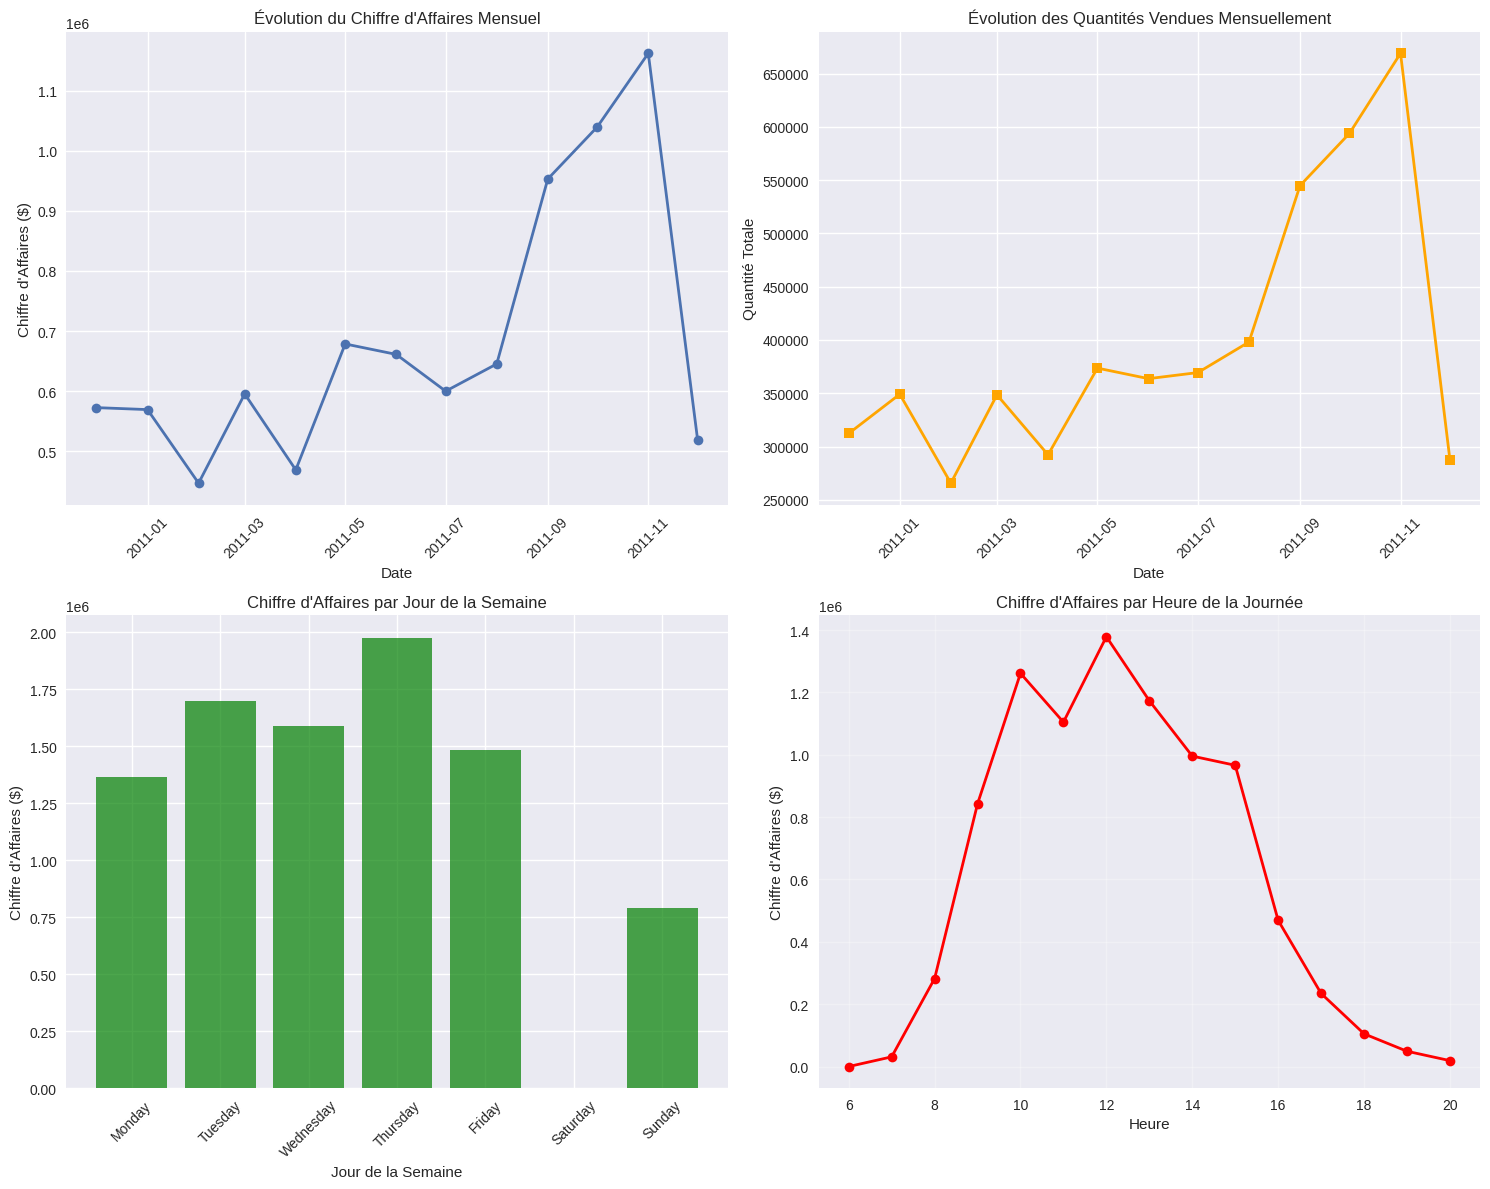

=== PÉRIODES LES PLUS CHARGÉES ===
Meilleur mois: 11/2011 - $1,161,817.38
Meilleur jour de la semaine: Thursday - $1,976,859.07
Meilleure heure: 12h - $1,378,571.48


In [ ]:
## Task 6: Sales Trends Over Time

print("\n=== ANALYSE DES TENDANCES DE VENTES ===")

# Agrégation par mois
monthly_sales = df_clean.groupby(['Year', 'Month']).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Créer une colonne date pour les graphiques
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

# Graphiques des tendances temporelles
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Évolution du chiffre d'affaires mensuel
axes[0, 0].plot(monthly_sales['Date'], monthly_sales['TotalAmount'], marker='o', linewidth=2)
axes[0, 0].set_title('Évolution du Chiffre d\'Affaires Mensuel')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Chiffre d\'Affaires ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Évolution des quantités vendues
axes[0, 1].plot(monthly_sales['Date'], monthly_sales['Quantity'], marker='s', color='orange', linewidth=2)
axes[0, 1].set_title('Évolution des Quantités Vendues Mensuellement')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Quantité Totale')
axes[0, 1].tick_params(axis='x', rotation=45)

# Ventes par jour de la semaine
daily_sales = df_clean.groupby('DayOfWeek')['TotalAmount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
axes[1, 0].bar(daily_sales.index, daily_sales.values, color='green', alpha=0.7)
axes[1, 0].set_title('Chiffre d\'Affaires par Jour de la Semaine')
axes[1, 0].set_xlabel('Jour de la Semaine')
axes[1, 0].set_ylabel('Chiffre d\'Affaires ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Ventes par heure de la journée
hourly_sales = df_clean.groupby('Hour')['TotalAmount'].sum()
axes[1, 1].plot(hourly_sales.index, hourly_sales.values, marker='o', color='red', linewidth=2)
axes[1, 1].set_title('Chiffre d\'Affaires par Heure de la Journée')
axes[1, 1].set_xlabel('Heure')
axes[1, 1].set_ylabel('Chiffre d\'Affaires ($)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identifier les mois et jours les plus chargés
print("=== PÉRIODES LES PLUS CHARGÉES ===")
best_month = monthly_sales.loc[monthly_sales['TotalAmount'].idxmax()]
print(f"Meilleur mois: {best_month['Month']:02d}/{best_month['Year']} - ${best_month['TotalAmount']:,.2f}")

best_day = daily_sales.idxmax()
print(f"Meilleur jour de la semaine: {best_day} - ${daily_sales[best_day]:,.2f}")

best_hour = hourly_sales.idxmax()
print(f"Meilleure heure: {best_hour}h - ${hourly_sales[best_hour]:,.2f}")




=== ANALYSE DES PRODUITS ET PAYS TOP PERFORMERS ===
=== TOP 10 PRODUITS PAR QUANTITÉ ===
1. 23843 - PAPER CRAFT , LITTLE BIRDIE... : 80,995 unités
2. 23166 - MEDIUM CERAMIC TOP STORAGE JAR... : 77,916 unités
3. 84077 - WORLD WAR 2 GLIDERS ASSTD DESIGNS... : 54,415 unités
4. 85099B - JUMBO BAG RED RETROSPOT... : 46,181 unités
5. 85123A - WHITE HANGING HEART T-LIGHT HOLDER... : 36,725 unités
6. 84879 - ASSORTED COLOUR BIRD ORNAMENT... : 35,362 unités
7. 21212 - PACK OF 72 RETROSPOT CAKE CASES... : 33,693 unités
8. 22197 - POPCORN HOLDER... : 30,931 unités
9. 23084 - RABBIT NIGHT LIGHT... : 27,202 unités
10. 22492 - MINI PAINT SET VINTAGE ... : 26,076 unités

=== TOP 10 PRODUITS PAR CHIFFRE D'AFFAIRES ===
1. 23843 - PAPER CRAFT , LITTLE BIRDIE... : $168,469.60
2. 22423 - REGENCY CAKESTAND 3 TIER... : $142,592.95
3. 85123A - WHITE HANGING HEART T-LIGHT HOLDER... : $100,448.15
4. 85099B - JUMBO BAG RED RETROSPOT... : $85,220.78
5. 23166 - MEDIUM CERAMIC TOP STORAGE JAR... : $81,416.73
6. P

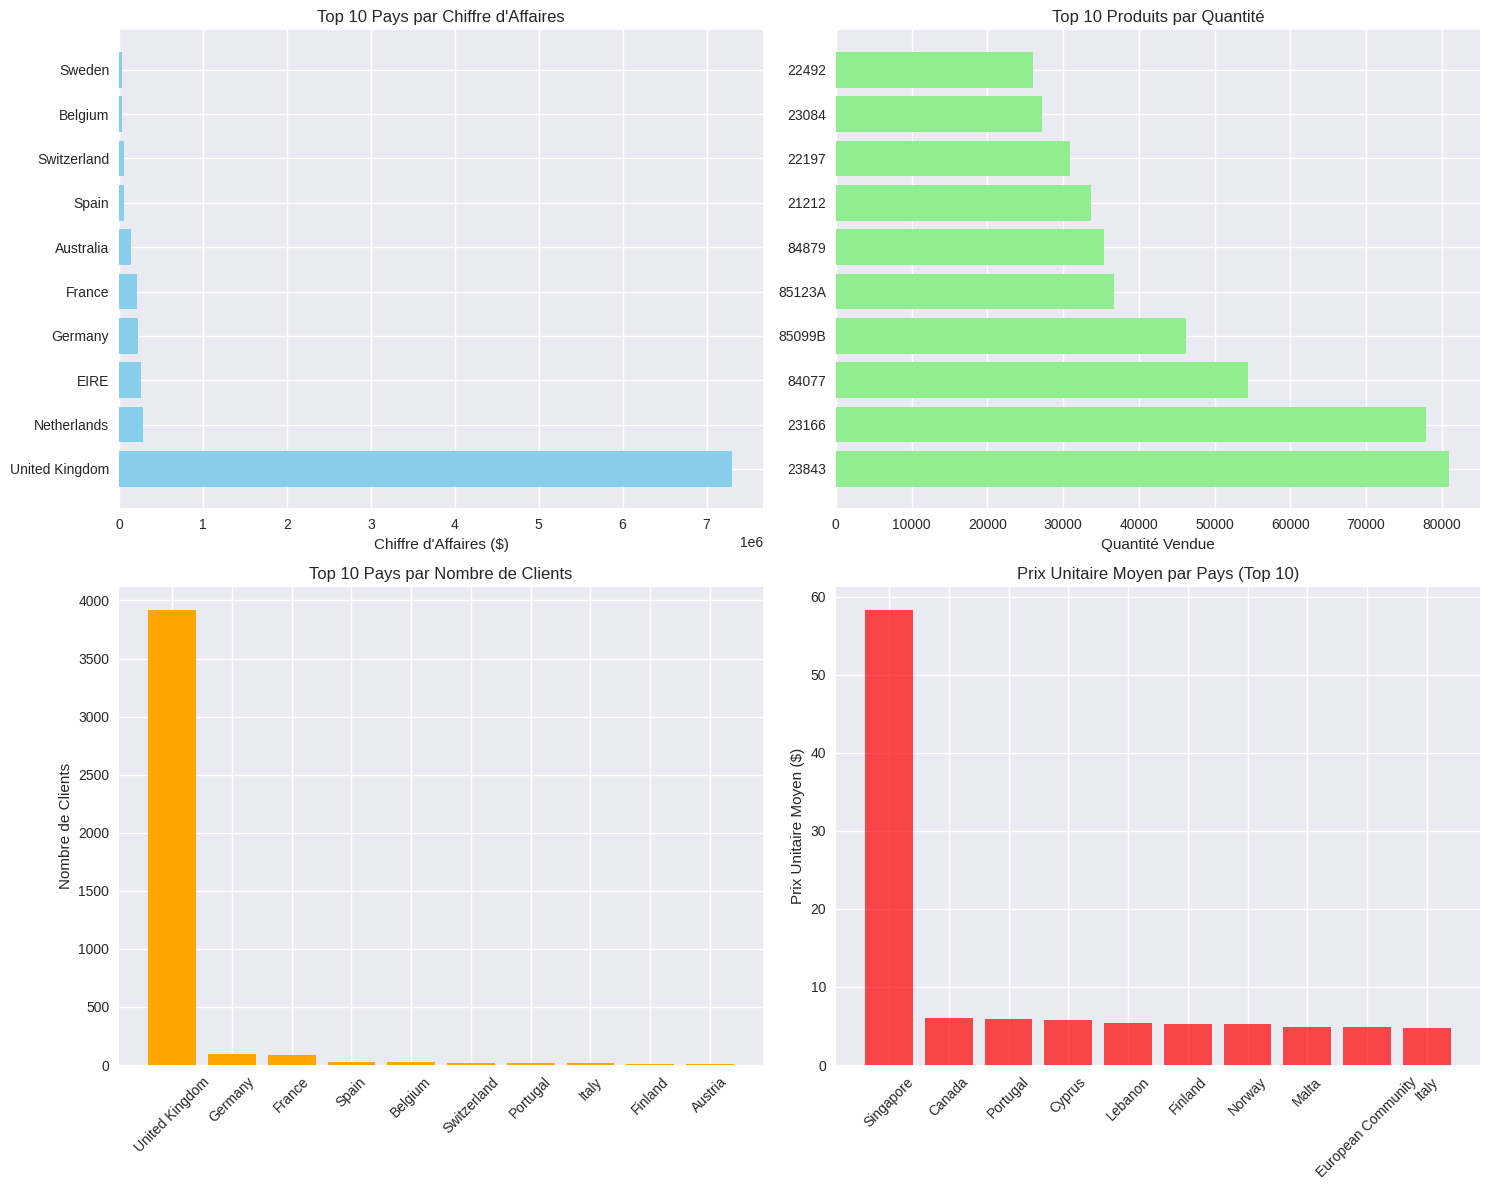

In [ ]:
## Task 7: Top Products and Countries Analysis

print("\n=== ANALYSE DES PRODUITS ET PAYS TOP PERFORMERS ===")

# Top 10 produits par quantité
top_products_qty = df_clean.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
print("=== TOP 10 PRODUITS PAR QUANTITÉ ===")
for i, ((code, desc), qty) in enumerate(top_products_qty.items(), 1):
    print(f"{i}. {code} - {desc[:50]}... : {qty:,} unités")

# Top 10 produits par chiffre d'affaires
top_products_revenue = df_clean.groupby(['StockCode', 'Description'])['TotalAmount'].sum().sort_values(ascending=False).head(10)
print("\n=== TOP 10 PRODUITS PAR CHIFFRE D'AFFAIRES ===")
for i, ((code, desc), revenue) in enumerate(top_products_revenue.items(), 1):
    print(f"{i}. {code} - {desc[:50]}... : ${revenue:,.2f}")

# Analyse par pays
country_analysis = df_clean.groupby('Country').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'CustomerID': 'nunique',
    'InvoiceNo': 'nunique'
}).sort_values('TotalAmount', ascending=False)

print("\n=== TOP 10 PAYS PAR CHIFFRE D'AFFAIRES ===")
top_countries = country_analysis.head(10)
for i, (country, data) in enumerate(top_countries.iterrows(), 1):
    print(f"{i}. {country}: ${data['TotalAmount']:,.2f} | {data['CustomerID']} clients | {data['Quantity']:,} unités")

# Visualisation des top pays et produits
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top 10 pays par chiffre d'affaires
axes[0, 0].barh(range(len(top_countries)), top_countries['TotalAmount'], color='skyblue')
axes[0, 0].set_yticks(range(len(top_countries)))
axes[0, 0].set_yticklabels(top_countries.index)
axes[0, 0].set_title('Top 10 Pays par Chiffre d\'Affaires')
axes[0, 0].set_xlabel('Chiffre d\'Affaires ($)')

# Top 10 produits par quantité
top_10_qty = top_products_qty.head(10)
product_labels = [f"{code}" for (code, desc) in top_10_qty.index]
axes[0, 1].barh(range(len(top_10_qty)), top_10_qty.values, color='lightgreen')
axes[0, 1].set_yticks(range(len(top_10_qty)))
axes[0, 1].set_yticklabels(product_labels)
axes[0, 1].set_title('Top 10 Produits par Quantité')
axes[0, 1].set_xlabel('Quantité Vendue')

# Distribution des clients par pays (top 10)
top_countries_customers = country_analysis.sort_values('CustomerID', ascending=False).head(10)
axes[1, 0].bar(range(len(top_countries_customers)), top_countries_customers['CustomerID'], color='orange')
axes[1, 0].set_xticks(range(len(top_countries_customers)))
axes[1, 0].set_xticklabels(top_countries_customers.index, rotation=45)
axes[1, 0].set_title('Top 10 Pays par Nombre de Clients')
axes[1, 0].set_ylabel('Nombre de Clients')

# Prix moyen par pays (top 10)
avg_price_country = df_clean.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head(10)
axes[1, 1].bar(range(len(avg_price_country)), avg_price_country.values, color='red', alpha=0.7)
axes[1, 1].set_xticks(range(len(avg_price_country)))
axes[1, 1].set_xticklabels(avg_price_country.index, rotation=45)
axes[1, 1].set_title('Prix Unitaire Moyen par Pays (Top 10)')
axes[1, 1].set_ylabel('Prix Unitaire Moyen ($)')

plt.tight_layout()
plt.show()


In [ ]:
## Task 8: Customer Analysis

print("\n=== ANALYSE DES CLIENTS ===")

# Analyse des clients
customer_analysis = df_clean.groupby('CustomerID').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'InvoiceNo': 'nunique',
    'InvoiceDate': ['min', 'max']
}).round(2)

# Aplatir les colonnes multi-niveaux
customer_analysis.columns = ['Total_Spent', 'Avg_Order_Value', 'Total_Orders', 'Total_Quantity', 'Unique_Invoices', 'First_Purchase', 'Last_Purchase']

# Calculer la durée de vie du client
customer_analysis['Customer_Lifespan_Days'] = (customer_analysis['Last_Purchase'] - customer_analysis['First_Purchase']).dt.days

# Top 10 clients par chiffre d'affaires
top_customers = customer_analysis.sort_values('Total_Spent', ascending=False).head(10)
print("=== TOP 10 CLIENTS PAR CHIFFRE D'AFFAIRES ===")
for i, (customer_id, data) in enumerate(top_customers.iterrows(), 1):
    print(f"{i}. Client {customer_id}: ${data['Total_Spent']:,.2f} | {data['Total_Orders']} commandes | Panier moyen: ${data['Avg_Order_Value']:.2f}")

# Statistiques clients
print(f"\n=== STATISTIQUES CLIENTS ===")
print(f"Nombre total de clients: {len(customer_analysis)}")
print(f"Panier moyen global: ${customer_analysis['Avg_Order_Value'].mean():.2f}")
print(f"Dépense totale moyenne par client: ${customer_analysis['Total_Spent'].mean():.2f}")
print(f"Nombre moyen de commandes par client: {customer_analysis['Total_Orders'].mean():.1f}")

# Segmentation des clients (RFM basique)
# Recency, Frequency, Monetary
current_date = df_clean['InvoiceDate'].max()
customer_analysis['Recency'] = (current_date - customer_analysis['Last_Purchase']).dt.days
customer_analysis['Frequency'] = customer_analysis['Total_Orders']
customer_analysis['Monetary'] = customer_analysis['Total_Spent']

# Créer des scores RFM (quintiles)
customer_analysis['R_Score'] = pd.qcut(customer_analysis['Recency'], 5, labels=[5,4,3,2,1])
customer_analysis['F_Score'] = pd.qcut(customer_analysis['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
customer_analysis['M_Score'] = pd.qcut(customer_analysis['Monetary'], 5, labels=[1,2,3,4,5])

# Créer un score RFM combiné
customer_analysis['RFM_Score'] = customer_analysis['R_Score'].astype(str) + customer_analysis['F_Score'].astype(str) + customer_analysis['M_Score'].astype(str)

print(f"\n=== SEGMENTATION RFM ===")
rfm_segments = customer_analysis['RFM_Score'].value_counts().head(10)
print("Top 10 segments RFM:")
for segment, count in rfm_segments.items():
    print(f"Segment {segment}: {count} clients")


=== ANALYSE DES CLIENTS ===
=== TOP 10 CLIENTS PAR CHIFFRE D'AFFAIRES ===
1. Client 14646.0: $280,206.02 | 2076 commandes | Panier moyen: $134.97
2. Client 18102.0: $259,657.30 | 431 commandes | Panier moyen: $602.45
3. Client 17450.0: $194,550.79 | 337 commandes | Panier moyen: $577.30
4. Client 16446.0: $168,472.50 | 3 commandes | Panier moyen: $56157.50
5. Client 14911.0: $143,825.06 | 5675 commandes | Panier moyen: $25.34
6. Client 12415.0: $124,914.53 | 714 commandes | Panier moyen: $174.95
7. Client 14156.0: $117,379.63 | 1400 commandes | Panier moyen: $83.84
8. Client 17511.0: $91,062.38 | 963 commandes | Panier moyen: $94.56
9. Client 16029.0: $81,024.84 | 242 commandes | Panier moyen: $334.81
10. Client 12346.0: $77,183.60 | 1 commandes | Panier moyen: $77183.60

=== STATISTIQUES CLIENTS ===
Nombre total de clients: 4338
Panier moyen global: $68.35
Dépense totale moyenne par client: $2054.27
Nombre moyen de commandes par client: 91.7

=== SEGMENTATION RFM ===
Top 10 segments 


=== DÉTECTION DES OUTLIERS ===

=== OUTLIERS POUR QUANTITY ===
Nombre d'outliers: 25,647 (6.45%)
Limites: [-13.00, 27.00]
Valeurs extrêmes: Min=1.00, Max=80995.00
Top 5 outliers les plus élevés:
  1. 581483 | 23843 | PAPER CRAFT , LITTLE BIRDIE... | 80995
  2. 541431 | 23166 | MEDIUM CERAMIC TOP STORAGE JAR... | 74215
  3. 573008 | 84077 | WORLD WAR 2 GLIDERS ASSTD DESI... | 4800
  4. 554868 | 22197 | SMALL POPCORN HOLDER... | 4300
  5. 544612 | 22053 | EMPIRE DESIGN ROSETTE... | 3906

=== OUTLIERS POUR UNITPRICE ===
Nombre d'outliers: 34,356 (8.63%)
Limites: [-2.50, 7.50]
Valeurs extrêmes: Min=0.00, Max=8142.75
Top 5 outliers les plus élevés:
  1. 551697 | POST | POSTAGE... | 8142.75
  2. 573077 | M | Manual... | 4161.06
  3. 573080 | M | Manual... | 4161.06
  4. 571751 | M | Manual... | 3949.32
  5. 569382 | M | Manual... | 3155.95

=== OUTLIERS POUR TOTALAMOUNT ===
Nombre d'outliers: 31,241 (7.85%)
Limites: [-18.00, 42.48]
Valeurs extrêmes: Min=0.00, Max=168469.60
Top 5 outliers le

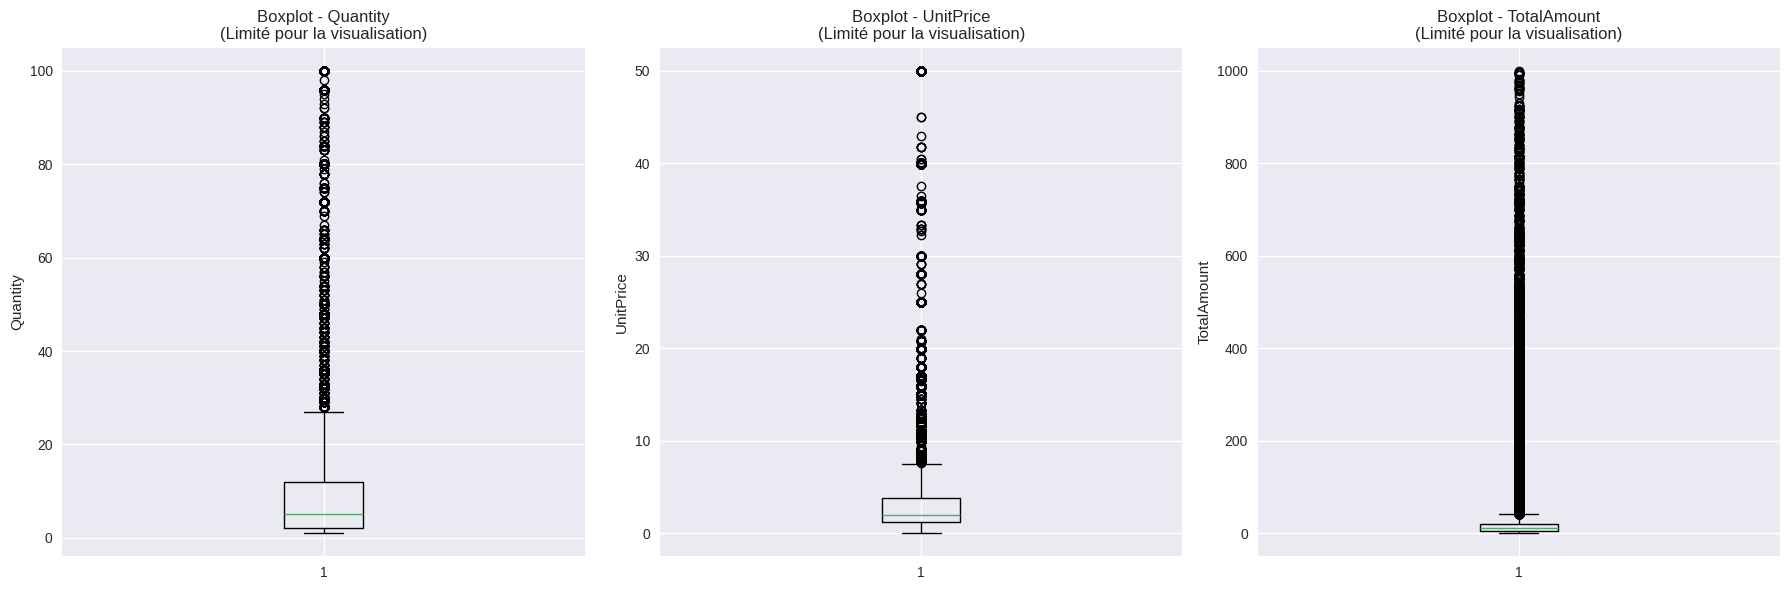

In [ ]:
## Task 9: Outliers Detection

print("\n=== DÉTECTION DES OUTLIERS ===")

# Fonction pour détecter les outliers avec IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyser les outliers pour les colonnes numériques principales
numeric_columns = ['Quantity', 'UnitPrice', 'TotalAmount']

for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    percentage = (len(outliers) / len(df_clean)) * 100
    print(f"\n=== OUTLIERS POUR {col.upper()} ===")
    print(f"Nombre d'outliers: {len(outliers):,} ({percentage:.2f}%)")
    print(f"Limites: [{lower:.2f}, {upper:.2f}]")
    print(f"Valeurs extrêmes: Min={df_clean[col].min():.2f}, Max={df_clean[col].max():.2f}")

    if len(outliers) > 0:
        print(f"Top 5 outliers les plus élevés:")
        top_outliers = outliers.nlargest(5, col)[['InvoiceNo', 'StockCode', 'Description', col]]
        for idx, (invoice, code, desc, value) in enumerate(top_outliers.itertuples(index=False), 1):
            print(f"  {idx}. {invoice} | {code} | {desc[:30]}... | {value}")

# Visualisation des outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numeric_columns):
    # Utiliser une limite pour la visualisation
    if col == 'TotalAmount':
        viz_data = df_clean[df_clean[col] <= 1000]  # Limite à 1000 pour la visualisation
    elif col == 'UnitPrice':
        viz_data = df_clean[df_clean[col] <= 50]   # Limite à 50 pour la visualisation
    else:
        viz_data = df_clean[df_clean[col] <= 100]  # Limite à 100 pour les quantités

    axes[i].boxplot(viz_data[col])
    axes[i].set_title(f'Boxplot - {col}\n(Limité pour la visualisation)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


=== ANALYSE DES CORRÉLATIONS ===
Matrice de corrélation:
             Quantity  UnitPrice  TotalAmount   Hour
Quantity        1.000     -0.005        0.914 -0.015
UnitPrice      -0.005      1.000        0.082 -0.000
TotalAmount     0.914      0.082        1.000 -0.013
Hour           -0.015     -0.000       -0.013  1.000


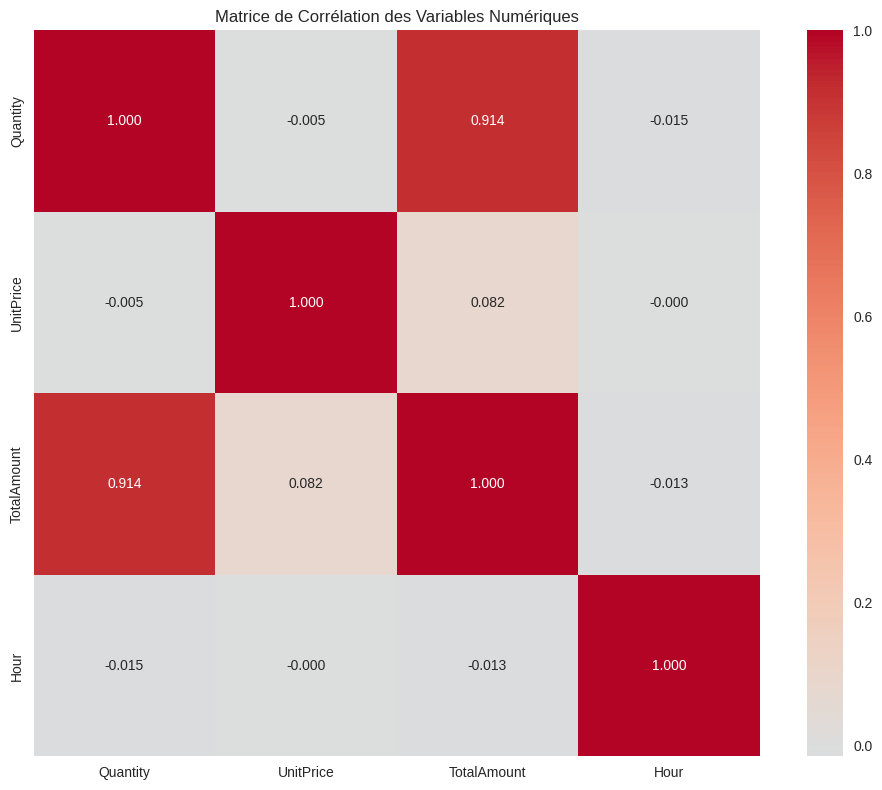


=== CORRÉLATIONS SIGNIFICATIVES (|r| > 0.5) ===
Quantity ↔ TotalAmount: 0.914


In [ ]:
## Task 10: Correlation Analysis

print("\n=== ANALYSE DES CORRÉLATIONS ===")

# Matrice de corrélation pour les variables numériques
correlation_columns = ['Quantity', 'UnitPrice', 'TotalAmount', 'Hour']
correlation_matrix = df_clean[correlation_columns].corr()

print("Matrice de corrélation:")
print(correlation_matrix.round(3))

# Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()

# Analyse des corrélations significatives
print("\n=== CORRÉLATIONS SIGNIFICATIVES (|r| > 0.5) ===")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} ↔ {var2}: {corr_value:.3f}")

